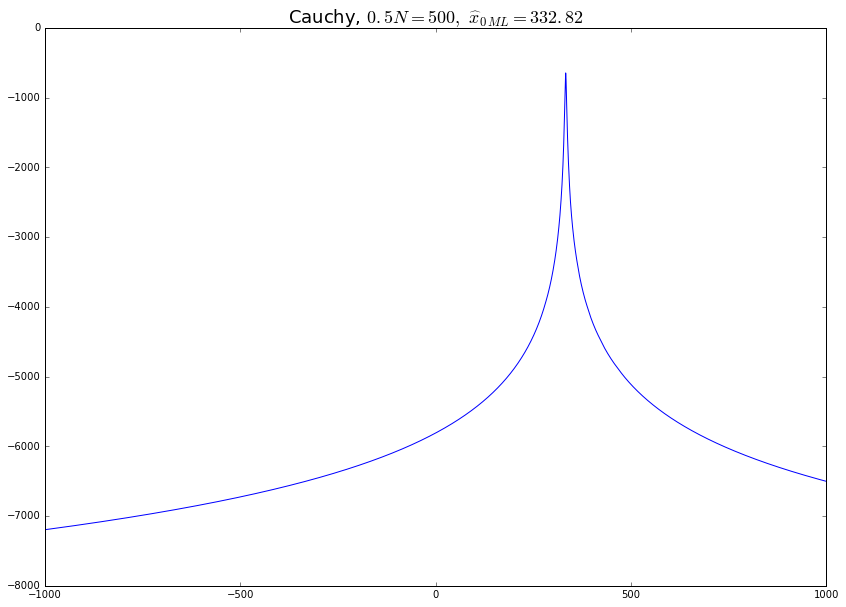

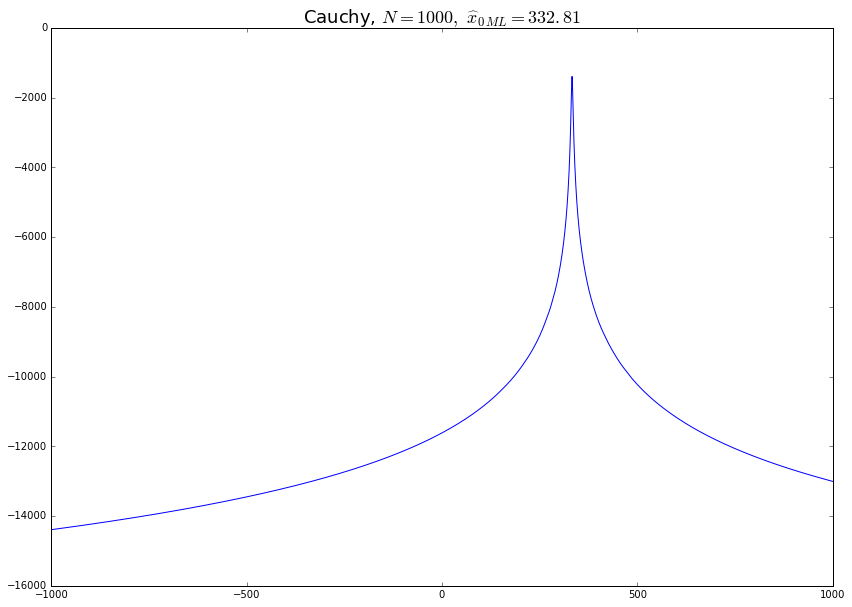

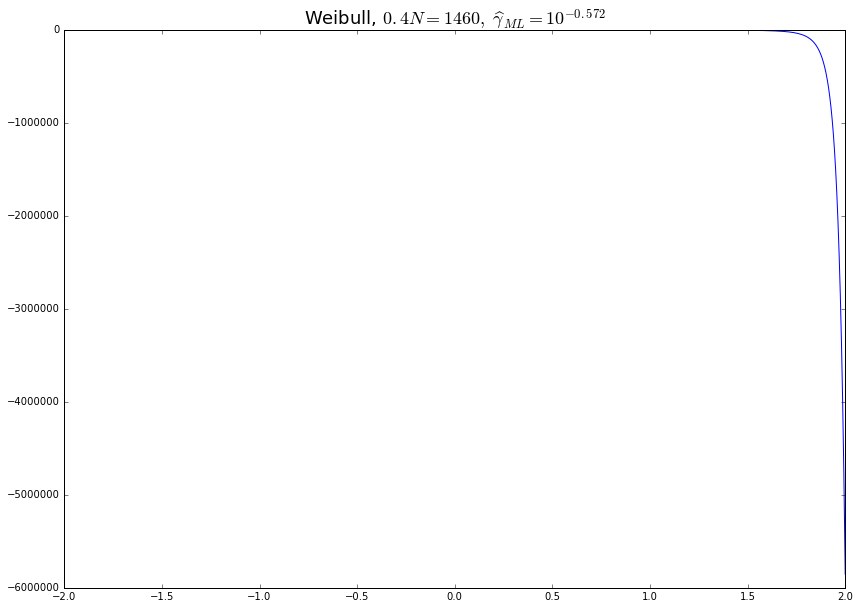

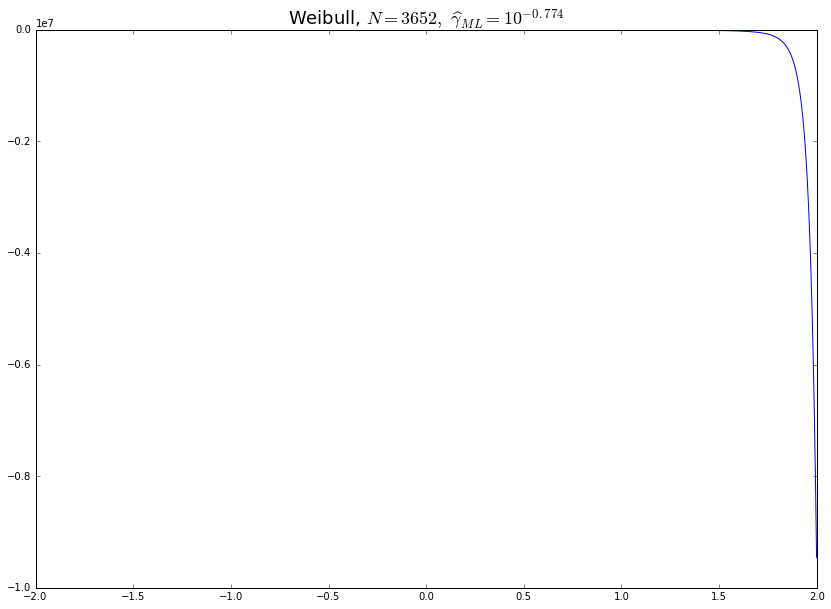

In [71]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
    
def log_likelihood_cauchy(x, x_0):
    sum = 0
    for x_i in x:
        sum += -np.log(1 + (x_i - x_0) ** 2)
    return sum
    

def log_likelihood_weibull(x, x_0):
    sum1, sum2 = 0, 0
    for x_i in x:
        sum1 += np.log(x_i)
        sum2 += x_i ** np.exp(x_0 * np.log(10))
    return x_0 * np.log(10) + (np.exp(x_0 * np.log(10)) - 1) * sum1 - sum2
              

# maximum likelihood estimation method
def estimate(x, left, right, step, log_likelihood, title):
    absc = np.arange(left, right, step)
    log_likelihood = [log_likelihood(x, i) for i in absc]
    x_0_ml = left + np.argmax(log_likelihood) * step
    
    plt.figure(figsize=(14, 10))
    plt.title(title + str(x_0_ml) + "}$", fontsize=18)
    plt.plot(absc, log_likelihood)
    plt.show()
    

def read_file(filename):
    with open(filename, 'r') as file:
        lines = list(map(float, file))
    file.close()
    return lines


# 1. Cauchy
lines = read_file('Cauchy.txt')

n = int(len(lines) / 2)
estimate(lines[:n], -1000, 1000, 0.01, log_likelihood_cauchy, "Cauchy, $0.5N = " + str(n) 
         + ",$ ${\\widehat{x}_0}_{ML} = {")
estimate(lines, -1000, 1000, 0.01, log_likelihood_cauchy, "Cauchy, $N = " + str(len(lines)) 
         + ",$ ${\\widehat{x}_0}_{ML} = {")

# 2. Weilbull
lines = read_file('Weibull.txt')

n = int(len(lines) * 0.4)
estimate(lines[:n], -2, 2, 0.001, log_likelihood_weibull, "Weibull, $0.4N = " + str(n) 
         + ",$ $\\widehat{\\gamma}_{ML} = 10^{")
estimate(lines, -2, 2, 0.001, log_likelihood_weibull, "Weibull, $N = " + str(len(lines)) 
         + ",$ $\\widehat{\\gamma}_{ML} = 10^{")